# Handout for Session 8 (with Solutions)

## 1. Brief Overview of Data Analytics Using Pandas

#### Loading data

In [1]:
import pandas as pd
base='https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/'
filename='gapminder.tsv'
data=pd.read_csv(base+filename,sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


#### Obtaining Basic Information

In [2]:
data.shape

(1704, 6)

In [3]:
data.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


#### Manipulating data

In [5]:
data['gdp']=data['pop']*data['gdpPercap']/1e9
data['pop']/=1e6
data['gdpPercap']/=1e3
data=data.set_index('year')
data.head(3)

,country,continent,lifeExp,pop,gdpPercap,gdp
year,,,,,,
1952,Afghanistan,Asia,28.801,8.425333,0.779445,6.567086
1957,Afghanistan,Asia,30.332,9.240934,0.820853,7.585449
1962,Afghanistan,Asia,31.997,10.267083,0.853101,8.758856


#### Filtering data

In [6]:
usa=data.query('country=="United States"')
usa.head(3)

,country,continent,lifeExp,pop,gdpPercap,gdp
year,,,,,,
1952,United States,Americas,68.44,157.553,13.990482,2204.242423
1957,United States,Americas,69.49,171.984,14.847127,2553.468311
1962,United States,Americas,70.21,186.538,16.173146,3016.906282


In [7]:
usa=data[data['country']=='United States']
usa.head(3)

,country,continent,lifeExp,pop,gdpPercap,gdp
year,,,,,,
1952,United States,Americas,68.44,157.553,13.990482,2204.242423
1957,United States,Americas,69.49,171.984,14.847127,2553.468311
1962,United States,Americas,70.21,186.538,16.173146,3016.906282


In [8]:
gdp=usa['gdp']
gdp.head()

year
1952    2204.242423
1957    2553.468311
1962    3016.906282
1967    3880.918003
1972    4576.999720
Name: gdp, dtype: float64

#### Plotting data

In [9]:
import matplotlib.pyplot as plt
gdp.plot(title='GDP of USA')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

<Figure size 640x480 with 1 Axes>

## 2. Pandas Series Basics

### 2.1 Creating a Series Object
#### From list

In [10]:
import pandas as pd
s=pd.Series([5,6,4])
s

0    5
1    6
2    4
dtype: int64

In [11]:
s=pd.Series([5,6,4],index=['apple','orange','grape'])
s

apple     5
orange    6
grape     4
dtype: int64

#### From dictionary

In [12]:
s=pd.Series({'apple':5,'orange':6,'grape':4})
s

apple     5
orange    6
grape     4
dtype: int64

#### From scratch

In [13]:
s=pd.Series()
s['apple']=5
s['orange']=6
s['grape']=4
s

apple     5
orange    6
grape     4
dtype: int64

### 2.2 Indexing a Series

#### Obtaining a single element

In [14]:
s[1]

6

In [15]:
s.iloc[1]

6

In [16]:
s.loc['orange']

6

#### Slicing a contiguous chunk.

In [17]:
s[:2]

apple     5
orange    6
dtype: int64

In [18]:
s.iloc[:2]

apple     5
orange    6
dtype: int64

In [19]:
s.loc[:'orange']

apple     5
orange    6
dtype: int64

#### Fancy indexing: specifying a list of positions

In [20]:
s[[0,2]]

apple    5
grape    4
dtype: int64

In [21]:
s.iloc[[0,2]]

apple    5
grape    4
dtype: int64

In [22]:
s.loc[['apple','orange']]

apple     5
orange    6
dtype: int64

#### Boolean indexing: specifying whether to include each element

In [23]:
s[[True,False,True]]

apple    5
grape    4
dtype: int64

**Q1-a:** Create the following `Series` object using three ways.

```python
Fritos     20
Cheetos    15
Lays       25
dtype: int64
```

In [24]:
t=pd.Series({'Fritos':20,'Cheetos':15,'Lays':25})
t

Fritos     20
Cheetos    15
Lays       25
dtype: int64

In [25]:
t=pd.Series([20,15,25],index=['Fritos','Cheetos','Lays'])
t

Fritos     20
Cheetos    15
Lays       25
dtype: int64

In [26]:
t=pd.Series()
t['Fritos']=20
t['Cheetos']=15
t['Lays']=25
t

Fritos     20
Cheetos    15
Lays       25
dtype: int64

**Q1-b:** Obtain the single element corresponding to `"Lays"` using five ways.

In [27]:
t[2]

25

In [28]:
t[-1]

25

In [29]:
t.iloc[2]

25

In [30]:
t.iloc[-1]

25

In [31]:
t.loc['Lays']

25

**Q1-c:** Obtain everything but the first element using at least four ways.

In [32]:
t[1:]

Cheetos    15
Lays       25
dtype: int64

In [33]:
t.iloc[1:]

Cheetos    15
Lays       25
dtype: int64

In [34]:
t.loc['Cheetos':]

Cheetos    15
Lays       25
dtype: int64

In [35]:
t[[False,True,True]]

Cheetos    15
Lays       25
dtype: int64

### 2.3 Manipulating  a Series Object

#### Basic information

In [36]:
s.index

Index(['apple', 'orange', 'grape'], dtype='object')

In [37]:
s.values

array([5, 6, 4])

In [38]:
s.unique()

array([5, 6, 4])

In [39]:
s.describe()

count    3.0
mean     5.0
std      1.0
min      4.0
25%      4.5
50%      5.0
75%      5.5
max      6.0
dtype: float64

#### Arithmetics

In [40]:
s+1

apple     6
orange    7
grape     5
dtype: int64

In [41]:
s>5

apple     False
orange     True
grape     False
dtype: bool

In [42]:
s[s>5]

orange    6
dtype: int64

In [43]:
(s>=6) | (s<=4)

apple     False
orange     True
grape      True
dtype: bool

In [44]:
s[(s>=6) | (s<=4)]

orange    6
grape     4
dtype: int64

In [45]:
(s>=5) & (s<=6)

apple      True
orange     True
grape     False
dtype: bool

In [46]:
s[(s>=5) & (s<=6)]

apple     5
orange    6
dtype: int64

#### Vectorized functions

In [47]:
import numpy as np
np.exp(s)

apple     148.413159
orange    403.428793
grape      54.598150
dtype: float64

In [48]:
s.mean()

5.0

#### Plotting

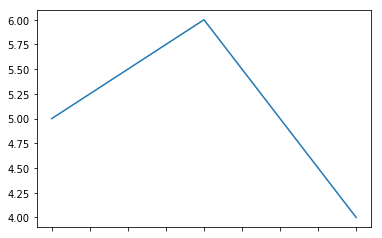

In [49]:
s.plot()

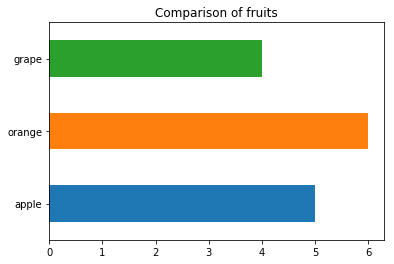

In [50]:
s.plot(kind='barh',title='Comparison of fruits')

**Q2-a:** Run the function `describe` on the Series `gdp` (from part 1 of this handout).

In [51]:
gdp.describe()

count       12.000000
mean      6396.826912
std       3524.169583
min       2204.242423
25%       3664.915073
50%       5554.323909
75%       8606.556438
max      12934.458535
Name: gdp, dtype: float64

**Q2-b:** Write an expression divides the Series `gdp` by 1000 and round to 2 decimal places (using the `round` function). 

In [52]:
round(gdp/1000,2)

year
1952     2.20
1957     2.55
1962     3.02
1967     3.88
1972     4.58
1977     5.30
1982     5.81
1987     7.26
1992     8.22
1997     9.76
2002    11.25
2007    12.93
Name: gdp, dtype: float64

**Q2-c:** Filter the Series `gdp` for values above 10000.

In [53]:
gdp[gdp>10000]

year
2002    11247.278678
2007    12934.458535
Name: gdp, dtype: float64

**Q2-d:** Obtain a Series corresponding to the life expectancy in USA when the GDP is above 10 trillion. (Hint: obtain the life expectancy column using `usa['lifeExp']` and use boolean indexing on `gdp1` as in Q2-b.)

In [54]:
usa['lifeExp'][gdp>10000]

year
2002    77.310
2007    78.242
Name: lifeExp, dtype: float64

**Q2-e:** Compute the average life expectancy in the data set for USA when the GDP is above 10 trillion. (Hint: call the function `mean` of the above Series.)

In [55]:
usa['lifeExp'][usa['gdp']>10000].mean()

77.77600000000001

**Q2-f:** Plot the life expectancy of USA in the data set using a line plot.

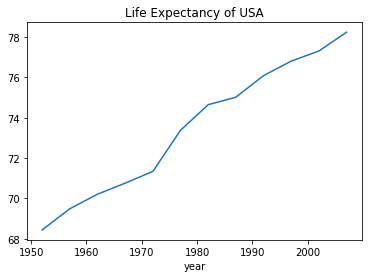

In [56]:
usa['lifeExp'].plot(title='Life Expectancy of USA')

## 3. Pandas DataFrame Basics II

### 3.1 Creating a DataFrame Object
#### From list of lists

In [57]:
import pandas as pd
df=pd.DataFrame([[5,3,'M'],[6,2,'M'],[4,1,'S']])
df

,0,1,2
0,5,3,M
1,6,2,M
2,4,1,S


In [58]:
df=pd.DataFrame([[5,3,'M'],[6,2,'M'],[4,1,'S']],\
                index=['apple','orange','grape'],\
                columns=['Number','Rank','Size'])
df

,Number,Rank,Size
apple,5,3,M
orange,6,2,M
grape,4,1,S


#### From dictionary of columns

In [59]:
df=pd.DataFrame({'Number':[5,6,4],'Rank':[2,1,3], 'Size':['M','M','S']},\
                index=['apple','orange','grape'])
df

,Number,Rank,Size
apple,5,2,M
orange,6,1,M
grape,4,3,S


### 3.2 Indexing a DataFrame

#### Obtaining a single element

In [60]:
df['Number'][0]

5

In [61]:
df.iloc[0,0]

5

In [62]:
df.loc['apple','Number']

5

#### Obtaining a column

In [63]:
df['Number']

apple     5
orange    6
grape     4
Name: Number, dtype: int64

In [64]:
df.iloc[:,0]

apple     5
orange    6
grape     4
Name: Number, dtype: int64

In [65]:
df.loc[:,'Number']

apple     5
orange    6
grape     4
Name: Number, dtype: int64

#### Obtaining a row

In [66]:
df.iloc[1,:]

Number    6
Rank      1
Size      M
Name: orange, dtype: object

In [67]:
df.loc['orange',:]

Number    6
Rank      1
Size      M
Name: orange, dtype: object

#### Obtaining particular rows

In [68]:
df.iloc[[0,2],:]

,Number,Rank,Size
apple,5,2,M
grape,4,3,S


In [69]:
df.loc[['apple','grape'],:]

,Number,Rank,Size
apple,5,2,M
grape,4,3,S


In [70]:
# Boolean indexing for Dataframes selects rows
df[[True,False,True]]

,Number,Rank,Size
apple,5,2,M
grape,4,3,S


**Q3-a:** Obtain the second column of the DataFrame `df` in at least three ways.

In [71]:
df['Rank']

apple     2
orange    1
grape     3
Name: Rank, dtype: int64

In [72]:
df.iloc[:,-1]

apple     M
orange    M
grape     S
Name: Size, dtype: object

In [73]:
df.loc[:,'Rank']

apple     2
orange    1
grape     3
Name: Rank, dtype: int64

**Q3-b:** Obtain the second and third row of the DataFrame `df` in at least five ways.

In [74]:
df.iloc[1:3,:]

,Number,Rank,Size
orange,6,1,M
grape,4,3,S


In [75]:
df.iloc[[1,2],:]

,Number,Rank,Size
orange,6,1,M
grape,4,3,S


In [76]:
df.loc['orange':'grape',:]

,Number,Rank,Size
orange,6,1,M
grape,4,3,S


In [77]:
df.loc[['orange','grape'],:]

,Number,Rank,Size
orange,6,1,M
grape,4,3,S


In [78]:
df[[False,True,True]]

,Number,Rank,Size
orange,6,1,M
grape,4,3,S


**Q3-c:** Obtain the rank of orange in at least four ways.

In [79]:
df['Rank']['orange']

1

In [80]:
df['Rank'][2]

3

In [81]:
df.iloc[2,1]

3

In [82]:
df.loc['orange','Rank']

1

**Q4-a:** Obtain the set of unique continents in the DataFrame `data`. (Hint: use the function `unique` associated with the Series `data['continent']`.)

In [83]:
data['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

**Q4-b:** Filter for the rows of the DataFrame `data` for which the continent is "Americas", year is 2007, and GDP is at least 1000. (You can either use the `query` function associated with the DataFrame or boolean indexing.)

In [84]:
data.query('continent=="Americas" and year==2007 and gdp >=1000').head()

,country,continent,lifeExp,pop,gdpPercap,gdp
year,,,,,,
2007,Brazil,Americas,72.390,190.010647,9.065801,1722.598680
2007,Canada,Americas,80.653,33.390141,36.319235,1212.704378
2007,Mexico,Americas,76.195,108.700891,11.977575,1301.973070
2007,United States,Americas,78.242,301.139947,42.951653,12934.458535


In [85]:
data[(data['continent']=='Americas') & (data.index==2007) & (data['gdp']>=1000)]

,country,continent,lifeExp,pop,gdpPercap,gdp
year,,,,,,
2007,Brazil,Americas,72.390,190.010647,9.065801,1722.598680
2007,Canada,Americas,80.653,33.390141,36.319235,1212.704378
2007,Mexico,Americas,76.195,108.700891,11.977575,1301.973070
2007,United States,Americas,78.242,301.139947,42.951653,12934.458535


**Q4-c:** Compute the average `gdpPercap` of the countries in the Americas in 1952, and also in 2007. (No need to do population weighted average.)

In [86]:
data.query('continent=="Americas" and year==1952')['gdpPercap'].mean()

4.0790625522

In [87]:
data['gdpPercap'][(data['continent']=='Americas') & (data.index==1952)].mean()

4.0790625522

In [88]:
data.query('continent=="Americas" and year==2007')['gdpPercap'].mean()

11.00303162536

In [89]:
data['gdpPercap'][(data['continent']=='Americas') & (data.index==2007)].mean()

11.00303162536

**Q4-d:** Create a bar graphs of the `gdpPercap` of countries in the Americas for the year 2007. (Optional: sort the bars in descending order.)

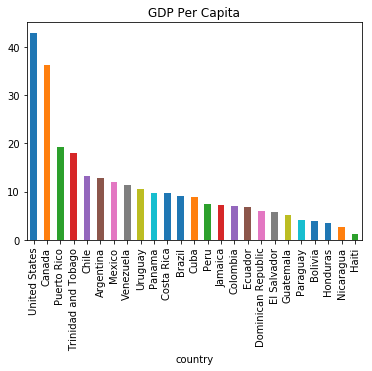

In [90]:
data.query('continent=="Americas" and year==2007').\
    sort_values(by='gdpPercap',ascending=False).\
    plot(x='country',y='gdpPercap',kind='bar',legend=False,title='GDP Per Capita')